# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [1]:
import pandas as pd

taxis = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')
taxis.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [2]:
taxis.shape

(10000, 18)

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [3]:
taxis[['fare_amount','tip_amount','tolls_amount','total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [4]:
taxis[['fare_amount','tip_amount','tolls_amount','total_amount']].loc[taxis['trip_distance'].idxmax()]

fare_amount     176.00
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: float64

---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [5]:
import pandas as pd

meteorites = pd.read_csv('../data/Meteorite_Landings.csv')
meteorites.rename(
    columns={
        'mass (g)': 'mass', 
        'year': 'when'
    },
    inplace=True
)

mask = meteorites.columns.str.contains('reclat|reclong', regex=True)
columns_to_drop = meteorites.columns[mask]
meteorites = meteorites.drop(columns=columns_to_drop)
meteorites.head()


,name,id,nametype,recclass,mass,fall,when,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,"(-33.16667, -64.95)"


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [6]:
meteorites = meteorites.assign(
    year=lambda x: x.when.str.slice(start=6,stop=10).astype('Int64'),
    before_1970=lambda y: y.year < 1970
)

In [7]:
meteorites.loc[10036:10040, 'id':'before_1970']

,id,nametype,recclass,mass,fall,when,GeoLocation,year,before_1970
10036,8432,Valid,CK5,15.5,Found,01/01/1990 12:00:00 AM,"(-76.28573, 156.45721)",1990,False
10037,8433,Valid,CK5,31.5,Found,01/01/1990 12:00:00 AM,"(-76.27507, 156.41038)",1990,False
10038,8434,Valid,Eucrite-br,22.8,Found,01/01/1990 12:00:00 AM,"(-76.28843, 156.47872)",1990,False
10039,8435,Valid,CK5,45.8,Found,01/01/1990 12:00:00 AM,"(-76.282, 156.39926)",1990,False
10040,8436,Valid,CK5,61.5,Found,01/01/1990 12:00:00 AM,"(-76.29226, 156.45353)",1990,False


#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [8]:
time_point = meteorites.query('year >= 2005 and year <= 2009')
time_point.pivot_table(index='year', values='mass', columns='fall')

fall,Fell,Found
year,,
2005,NaN,2148.813936
2006,8844.600000,2071.143612
2007,21944.801250,462.655226
2008,30941.444444,1233.549207
2009,3109.310000,1516.869149


#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

In [9]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [10]:
import pandas as pd

tsa_melted_holiday_travel = pd.read_csv(
    '../data/tsa_melted_holiday_travel.csv', 
    parse_dates=True, index_col='date'
)
tsa_melted_holiday_travel.head()

,year,travelers,holiday
date,,,
2019-01-01,2019,2126398.0,New Year's Day
2019-01-02,2019,2345103.0,New Year's Day
2019-01-03,2019,2202111.0,NaN
2019-01-04,2019,2150571.0,NaN
2019-01-05,2019,1975947.0,NaN


<AxesSubplot:title={'center':'2020 TSA Traveler Throughput'}, xlabel='date', ylabel='travelers'>

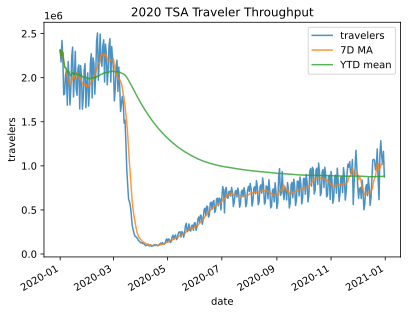

In [11]:
# line graph
tsa_melted_holiday_travel.drop(columns='year').loc['2020'].assign(
    **{
        '7D MA': lambda x: x.travelers.rolling('7D').mean(),
        'YTD mean': lambda x: x.travelers.expanding().mean()
      }
).plot(title='2020 TSA Traveler Throughput', ylabel='travelers', alpha=0.8)

In [12]:
plot_data = tsa_melted_holiday_travel['2019':'2021-04']\
    .assign(month=lambda x: x.index.month)\
    .pivot_table(index='month', columns='year', values='travelers', aggfunc='sum')
plot_data.head()

year,2019,2020,2021
month,,,
1,59405722.0,61930286.0,23598230.0
2,57345684.0,60428859.0,24446345.0
3,72530252.0,32995003.0,38050060.0
4,70518994.0,3322548.0,41826159.0
5,74617773.0,7244733.0,NaN


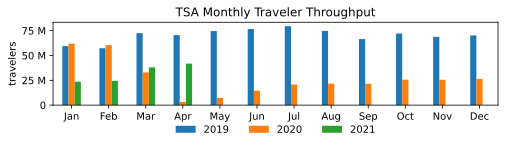

In [13]:
import calendar
from matplotlib import ticker

ax = plot_data.plot(
    kind='bar', rot=0, xlabel='', ylabel='travelers',
    figsize=(8, 1.5), title='TSA Monthly Traveler Throughput'
)

# use month abbreviations for the ticks on the x-axis
ax.set_xticklabels(calendar.month_abbr[1:])

# show y-axis labels in millions instead of scientific notation
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# customize the legend
ax.legend(title='', loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)

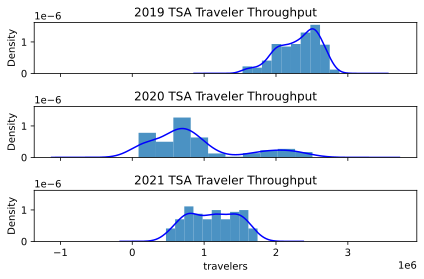

In [14]:
import matplotlib.pyplot as plt
# define the subplot layout
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(6, 4))

for year, ax in zip(tsa_melted_holiday_travel.year.unique(), axes):
    plot_data = tsa_melted_holiday_travel.loc[str(year)].travelers
    plot_data.plot(kind='hist', legend=False, density=True, alpha=0.8, ax=ax)
    plot_data.plot(kind='kde', legend=False, color='blue', ax=ax)
    ax.set(title=f'{year} TSA Traveler Throughput', xlabel='travelers')

fig.tight_layout() # handle overlaps

#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

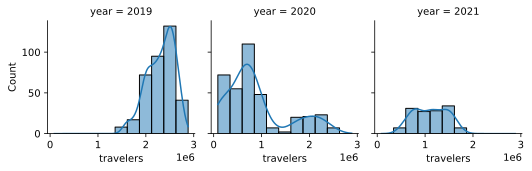

In [15]:
import seaborn as sns

sns.displot(
    data=tsa_melted_holiday_travel, x='travelers', col='year', kde=True, height=2.5
)

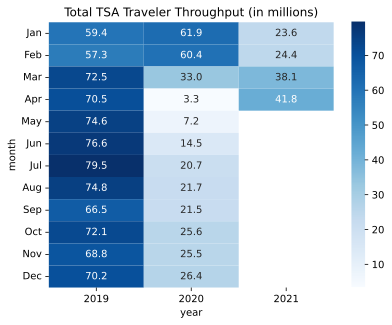

In [16]:
data = tsa_melted_holiday_travel['2019':'2021-04']\
    .assign(month=lambda x: x.index.month)\
    .pivot_table(index='month', columns='year', values='travelers', aggfunc='sum')

ax = sns.heatmap(data=data / 1e6, cmap='Blues', annot=True, fmt='.1f')
_ = ax.set_yticklabels(calendar.month_abbr[1:], rotation=0)
_ = ax.set_title('Total TSA Traveler Throughput (in millions)')

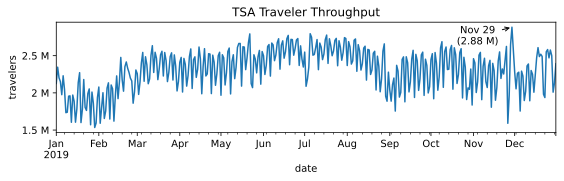

In [17]:
plot_data = tsa_melted_holiday_travel.loc['2019']
ax = plot_data.travelers.plot(
    title='TSA Traveler Throughput', ylabel='travelers', figsize=(9, 2)
)
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# highest throughput
max_throughput_date = plot_data.travelers.idxmax()
max_throughput = plot_data.travelers.max()
_ = ax.annotate(
    f'{max_throughput_date:%b %d}\n({max_throughput / 1e6:.2f} M)',
    xy=(max_throughput_date, max_throughput),
    xytext=(max_throughput_date - pd.Timedelta(days=25), max_throughput * 0.92),
    arrowprops={'arrowstyle': '->'}, ha='center'
)

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.

In [18]:
scans = pd.read_csv('../data/api_scan.csv')
scans.rename(
    columns={
        'collector_name': 'Collector',
        'status': 'Status'
    },
    inplace=True
)

scans['Collector'] = scans['Collector'].str.removeprefix('collector_')
scans = scans.sort_values(['Collector', 'Status'])
scans.head()

,started,completed,Collector,Status
3,2022-10-26 15:17:28.889955+00,2022-10-26 15:17:29.025129+00,dns,Completed
4,2022-10-26 15:17:28.893499+00,2022-10-26 15:17:29.036887+00,dns,Completed
13,2022-10-26 15:17:29.317944+00,2022-10-26 15:17:29.59787+00,dns,Completed
14,2022-10-26 15:17:29.341816+00,2022-10-26 15:17:29.429727+00,dns,Completed
28,2022-10-26 15:17:39.307352+00,2022-10-26 15:18:07.967709+00,dns,Completed


<AxesSubplot:xlabel='Count', ylabel='Collector'>

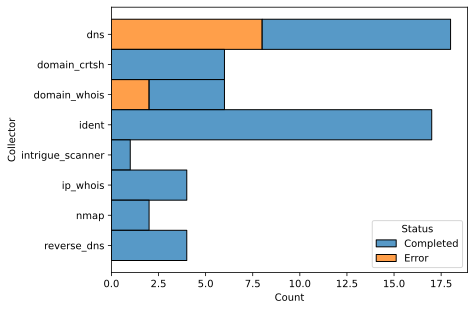

In [19]:
sns.histplot(scans, y='Collector', hue='Status', multiple='stack')

<AxesSubplot:xlabel='Count', ylabel='Collector'>

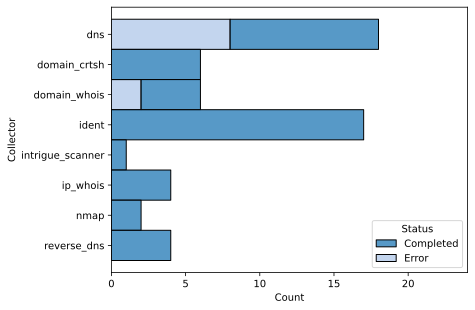

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots()
# sns.set_color_codes("pastel")
# blues = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
# cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])

ax.set(xlim=(0,24), ylabel="", xlabel="Count")
sns.histplot(scans, y='Collector', hue='Status', multiple='stack', palette="tab20")


In [21]:
sns.color_palette("tab20")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

In [22]:
assets = pd.read_csv('../data/staging_assets.csv')
assets.dtypes

address        object
domains        object
first_seen     object
hostname       object
ip_version      int64
known            bool
last_seen      object
name           object
online           bool
risk_score    float64
dtype: object

In [23]:
assets[['address', 'risk_score']].head()

,address,risk_score
0,3.224.115.40,6.528397
1,3.219.196.169,16.320992
2,143.204.86.22,9.792595
3,52.203.213.7,16.320992
4,108.138.85.73,9.792595


In [24]:
assets.rename(
    columns={
        'address':'Address',
        'domains':'Domains',
        'first_seen':'First Seen',
        'last_seen': 'Last Seen',
        'hostname':'Hostname',
        'name':'Name',
        'online':'Online',
        'ip_version': 'IP Version',
        'risk_score':'Risk Score'
    },
    inplace=True    
)
assets.head()

,Address,Domains,First Seen,Hostname,IP Version,known,Last Seen,Name,Online,Risk Score
0,3.224.115.40,ec2-3-224-115-40.compute-1.amazonaws.com,2022-10-14T00:00:00.875836Z,ec2-3-224-115-40.compute-1.amazonaws.com,4,False,2022-10-26T00:00:00.417605Z,ec2-3-224-115-40.compute-1.amazonaws.com,True,6.528397
1,3.219.196.169,ec2-3-219-196-169.compute-1.amazonaws.com,2022-10-04T00:00:00.346170Z,ec2-3-219-196-169.compute-1.amazonaws.com,4,False,2022-10-04T00:00:00.346170Z,ec2-3-219-196-169.compute-1.amazonaws.com,True,16.320992
2,143.204.86.22,"server-143-204-86-22.nrt12.r.cloudfront.net,do...",2022-05-10T00:00:00.812885Z,server-143-204-86-22.nrt12.r.cloudfront.net,4,False,2022-05-10T00:00:00.812885Z,documentation.catosec.io,True,9.792595
3,52.203.213.7,ec2-52-203-213-7.compute-1.amazonaws.com,2022-10-13T00:00:00.446386Z,ec2-52-203-213-7.compute-1.amazonaws.com,4,False,2022-10-13T00:00:00.446386Z,ec2-52-203-213-7.compute-1.amazonaws.com,True,16.320992
4,108.138.85.73,"server-108-138-85-73.iad12.r.cloudfront.net,do...",2022-10-15T00:00:00.364146Z,server-108-138-85-73.iad12.r.cloudfront.net,4,False,2022-10-15T00:00:00.364146Z,documentation.catosec.io,True,9.792595


<AxesSubplot:xlabel='Risk Score', ylabel='Count'>

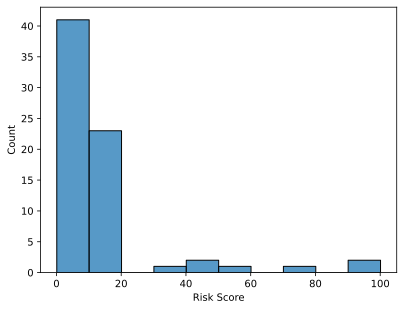

In [25]:
sns.histplot(assets, x='Risk Score', binwidth=10)

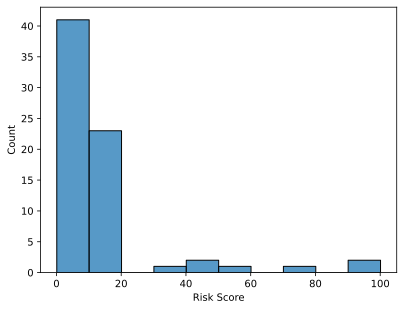

In [26]:
sns.histplot(assets, x='Risk Score', binwidth=10).get_figure().savefig('../data/risk-scores.png')